# Punto 1

Investigar y seleccionar un dataset que cumpla con tener entre 1000 y 10.000 muestras, 5 o más atributos numéricos y al menos un atributo categórico (Recomendación: seleccionar un atributo a predecir binario). De encontrar algún dataset sin atributos categóricos, ¿Como se podría generar uno binario a partir de los atributos numéricos? Se recomienda utilizar Kaggle para la búsqueda del dataset. Antes de avanzar con el trabajo práctico, corroborar el dataset en clase.

In [1]:
import pandas as pd

In [8]:
info: pd.DataFrame = pd.read_csv('ford.csv')
info = info[:10000]
info

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
9995,Focus,2017,10795,Manual,25000,Petrol,145,61.4,1.0
9996,Focus,2019,15695,Manual,18800,Petrol,145,58.9,1.0
9997,Fiesta,2016,8495,Manual,22969,Petrol,0,65.7,1.0
9998,Focus,2018,11995,Manual,19036,Petrol,145,60.1,1.0


In [3]:
info.describe(include='object')

,model,transmission,fuelType
count,10000,10000,10000
unique,18,3,4
top,Fiesta,Manual,Petrol
freq,3749,8945,6836


# Punto 2

Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería seaborn para realizar los gráficos.

In [4]:
import seaborn as sns

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-pa

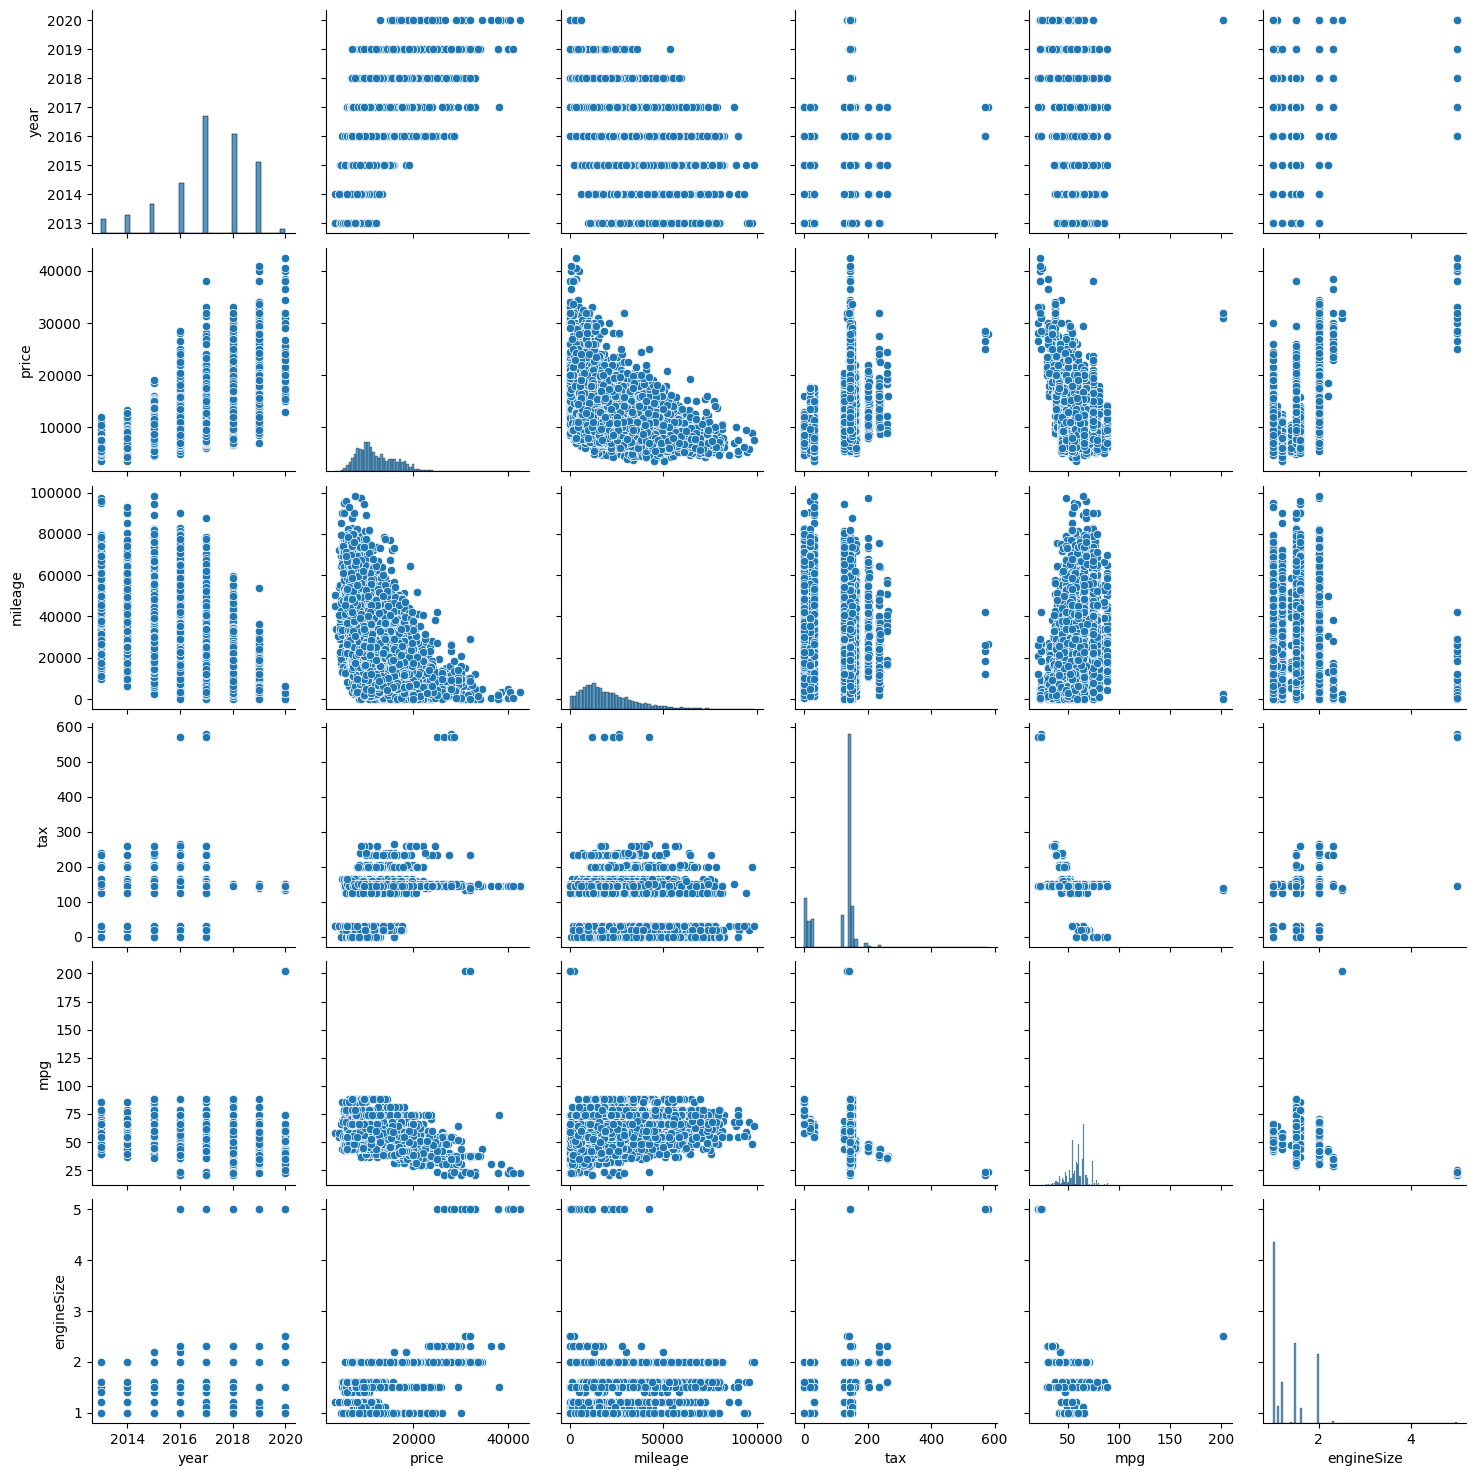

In [13]:
sns.pairplot(info)

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-pa

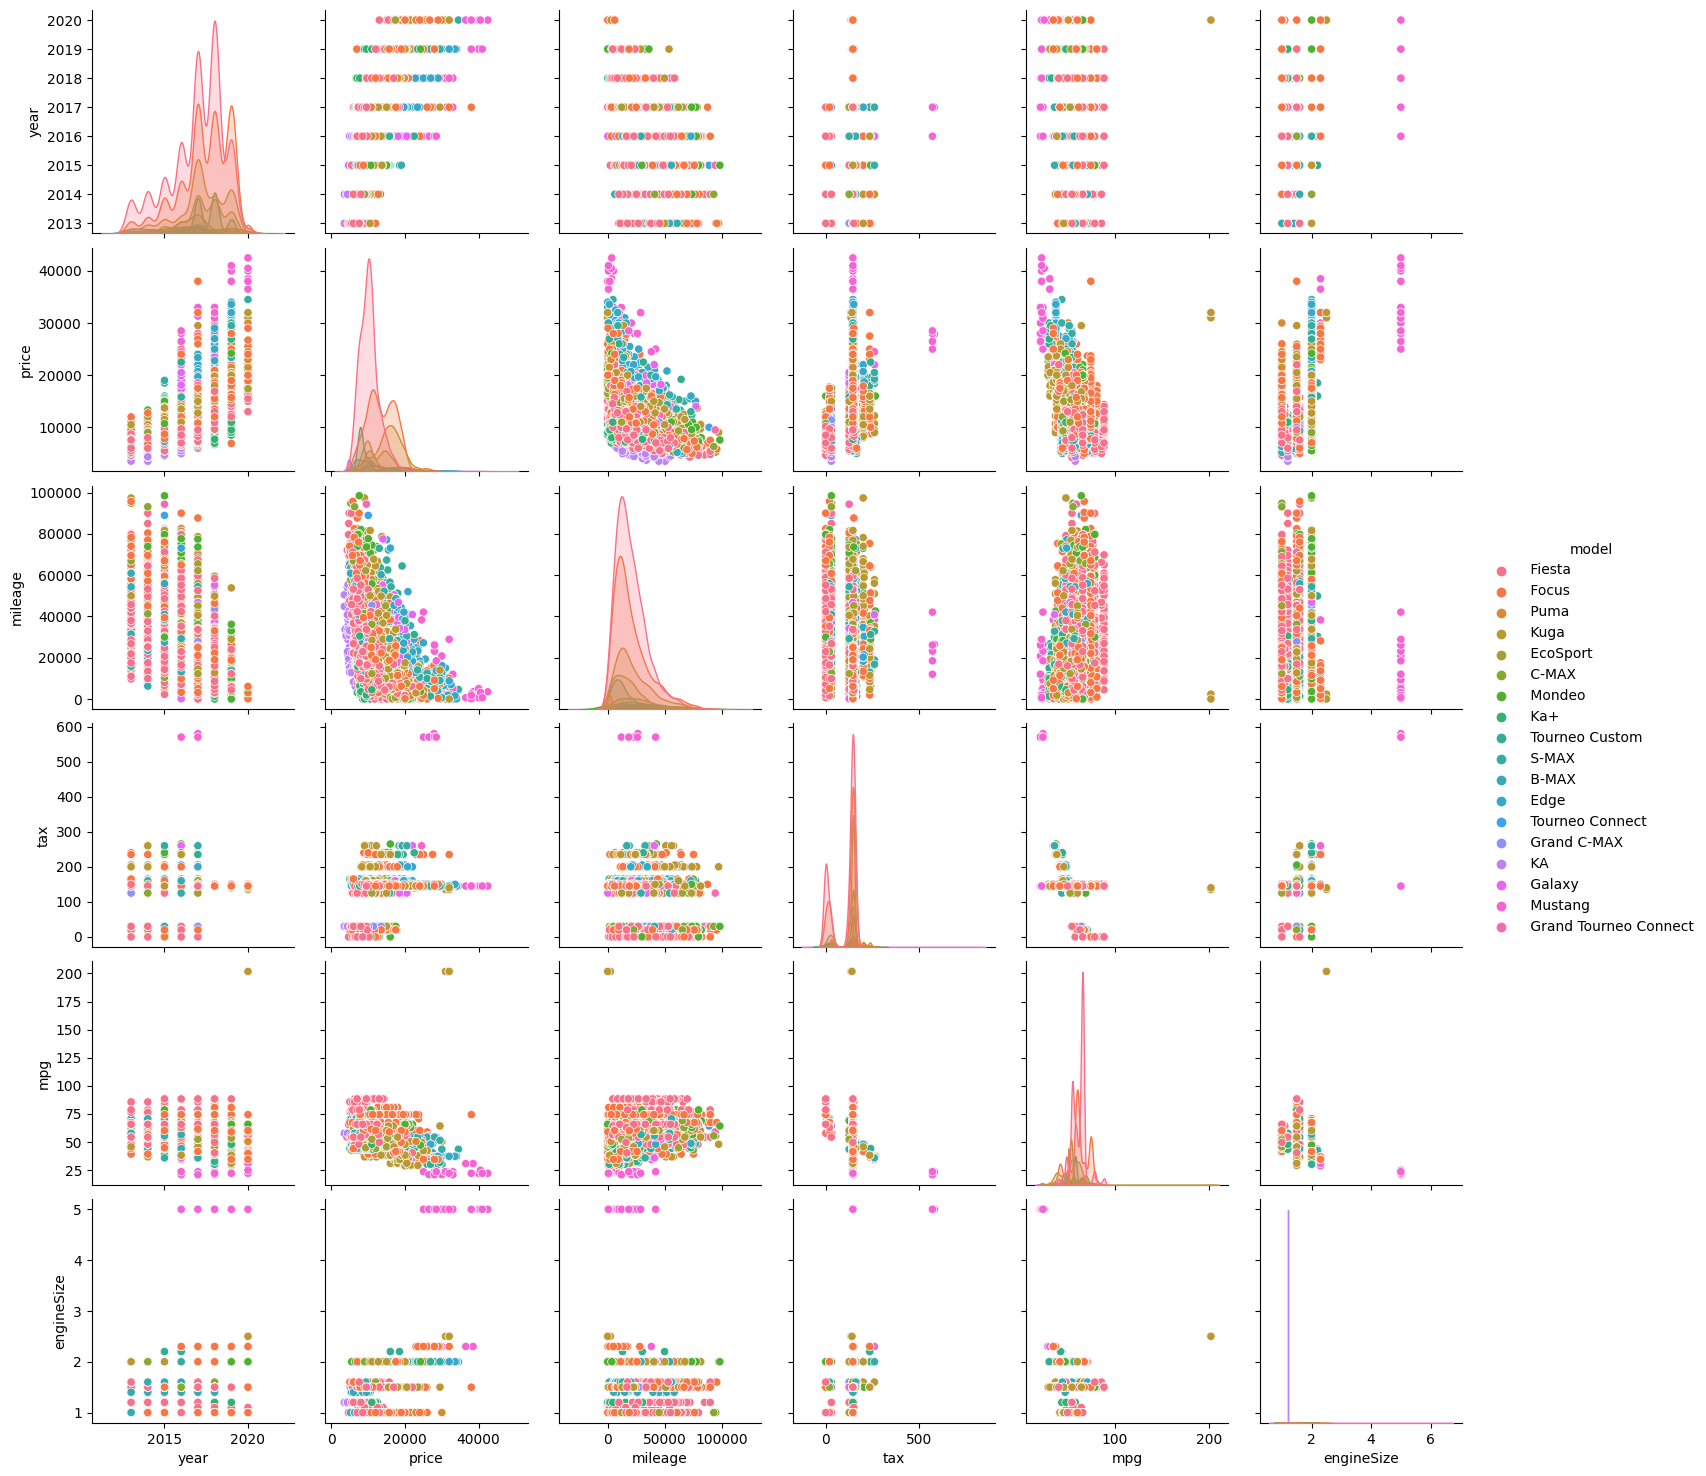

In [14]:
sns.pairplot(info, hue='model')

En esta serie de graficos observamos que la mayoría de características no varían demasiado cuando son el mismo modelo de auto, es por esto que este atributo puede ser una buena opción para predecir.

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-pa

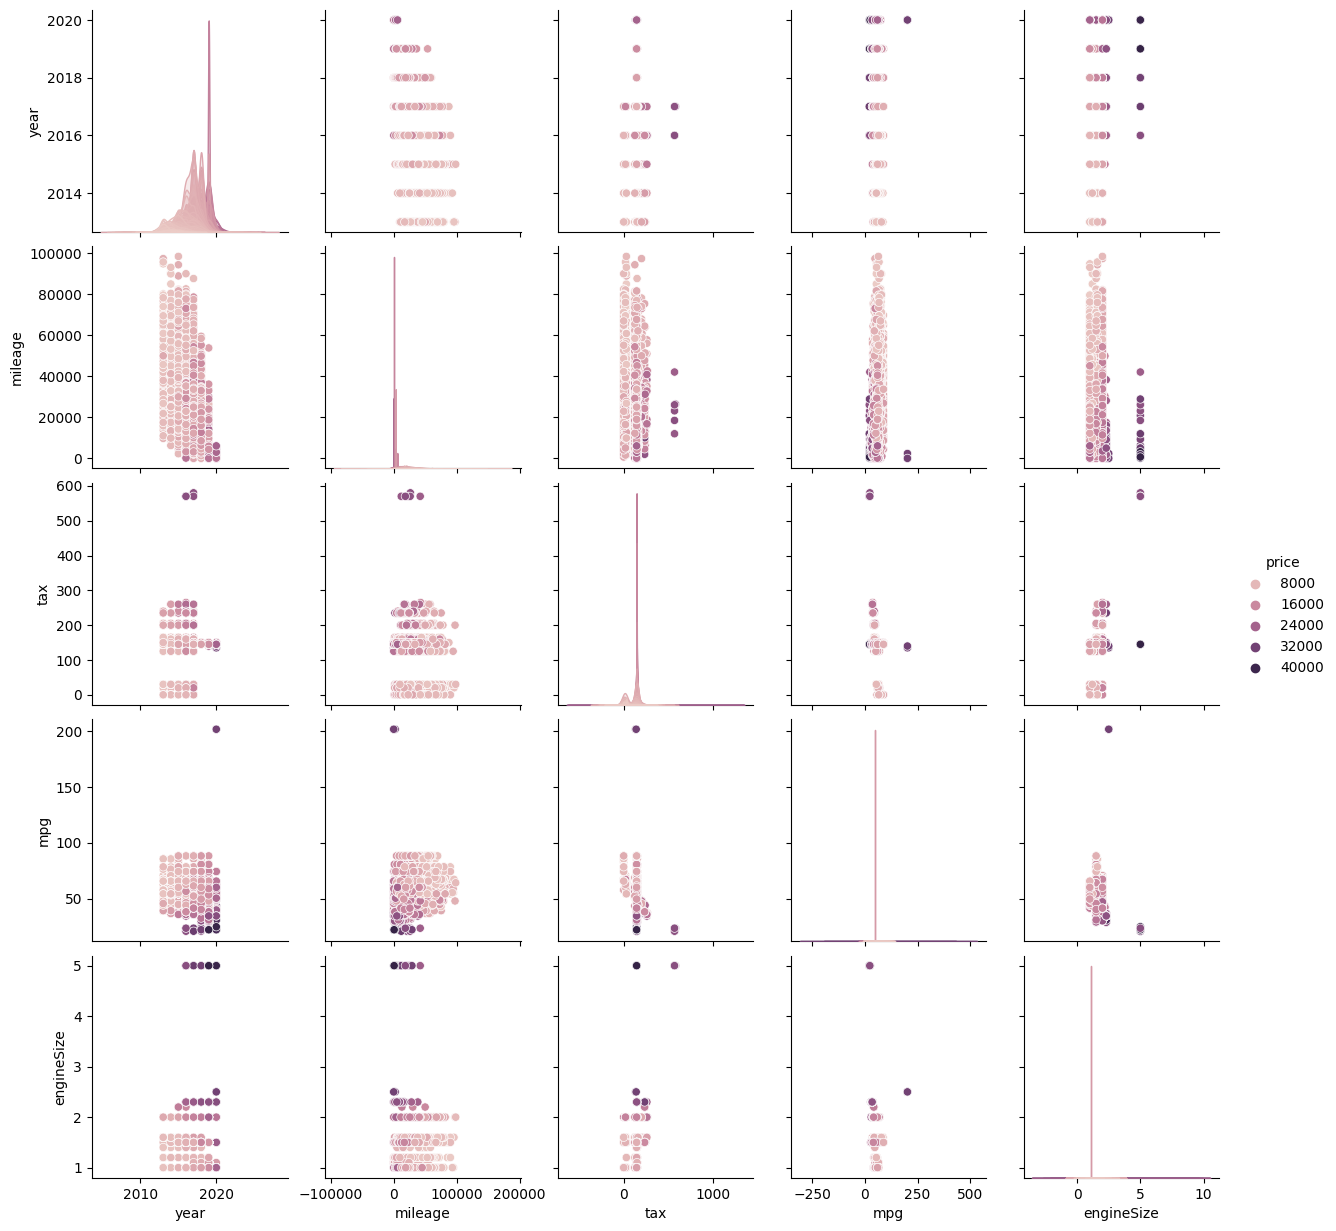

In [15]:
sns.pairplot(info, hue='price')

En este grafico podemos identificar que los autos más caros son también los más elevados en las demas categorías.
Además hay otras cosas que pueden variar el precio los autos, principalmente su modelo.
Por estas cuestiones nos parece la más adecuada para predecir.

# Punto 3

Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función LabelEncoder de SciKit-Learn para convertir el atributo categórico a numérico.

In [9]:
import sklearn as sk
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [10]:
info['model'] = le.fit_transform(info['model'])
info['transmission'] = le.fit_transform(info['transmission'])
info['fuelType'] = le.fit_transform(info['fuelType'])
info

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,4,2017,12000,0,15944,3,150,57.7,1.0
1,5,2018,14000,1,9083,3,150,57.7,1.0
2,5,2017,13000,1,12456,3,150,57.7,1.0
3,4,2019,17500,1,10460,3,145,40.3,1.5
4,4,2019,16500,0,1482,3,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
9995,5,2017,10795,1,25000,3,145,61.4,1.0
9996,5,2019,15695,1,18800,3,145,58.9,1.0
9997,4,2016,8495,1,22969,3,0,65.7,1.0
9998,5,2018,11995,1,19036,3,145,60.1,1.0


# Punto 4

Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función train_test_split de SciKit-Learn.

In [161]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(info, test_size=0.2)
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2840,4,2016,12852,1,12240,3,145,47.9,1.6
9740,11,2017,16250,1,13193,0,145,60.1,2.0
6962,5,2018,13495,1,14125,3,145,57.7,1.0
5461,4,2016,9397,1,3596,3,0,65.7,1.0
9542,5,2019,19000,1,3849,3,145,51.4,1.5
...,...,...,...,...,...,...,...,...,...
6739,4,2015,8200,1,32423,3,0,65.7,1.0
8391,4,2018,11091,1,17474,3,145,65.7,1.0
6283,2,2018,15210,1,6387,3,145,54.3,1.0
8940,5,2018,15300,1,6898,3,150,58.9,1.0


# Punto 5

Para el atributo numérico a predecir seleccionado:

Realizar un modelo de regresión lineal utilizando la clase LinearRegression de SciKit-Learn.

In [162]:
X_train = train.drop(['price'], axis=1)
y_train = train['price']

X_test = test.drop(['price'], axis=1)
y_test = test['price']

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(X_train, y_train)

cross_val_score(lr, X_train, y_train, cv=5)

array([0.73832084, 0.75346002, 0.73769929, 0.70697974, 0.71856637])

Realizar un modelo de Árbol de Decisión utilizando la clase DecisionTreeRegressor de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.

In [167]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=3, splitter='best')

treg = dtr.fit(X_train, y_train)
cross_val_score(treg, X_test, y_test, cv=10)

array([0.81554784, 0.86907741, 0.88284977, 0.91479822, 0.86081492,
       0.83753193, 0.82691384, 0.87688022, 0.8362599 , 0.83941228])